In [1]:
import pandas as pd
import numpy as np

#chargement des donnees
df = pd.read_csv("retail_store_sales.csv")

#appercu des premiere ligne
df.head()

#infos generale sur les donnees (type,valeur null)
df.info()

#resume statistique
df.describe(include='all')

#verification des valeurs manquante
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

# Netoyage de mon Dateset

In [2]:
# Surpression des donnees
print("Doublons:", df.duplicated().sum())

# ici il n'y a 0 doublon donc pas besoin de supprimer.

Doublons: 0


In [3]:
# Gerer les valeur manquante
print(df.isnull().sum())

# surppression de ligne trop incomplet

df=df.dropna() # ne concerve que les ligne ayant au moin 3 valeur non null

df

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
...,...,...,...,...,...,...,...,...,...,...,...
12566,TXN_6298574,CUST_01,Milk Products,Item_1_MILK,5.0,4.0,20.0,Cash,Online,2023-05-09,False
12567,TXN_4890318,CUST_25,Butchers,Item_3_BUT,8.0,5.0,40.0,Credit Card,In-store,2023-03-28,False
12569,TXN_2318174,CUST_18,Patisserie,Item_1_PAT,5.0,9.0,45.0,Digital Wallet,In-store,2024-05-13,False
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False


In [4]:
# les incoherences

#calcul du total attendu
df['Calculated Total'] = df['Price Per Unit']*df['Quantity']

#Identifiant des incoherence
inconsistent= ~np.isclose(df['Total Spent'], df['Calculated Total'], rtol=0.01)
print(f"\nNombre d'incoherences prix*Quantiter vs total:{inconsistent.sum()}")

#formatage des types de donnnees

#standardisation des boolean
df['Discount Applied']= df['Discount Applied'].astype(bool)

df


Nombre d'incoherences prix*Quantiter vs total:0


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Calculated Total
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,185.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,261.0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,43.0
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,87.5
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12566,TXN_6298574,CUST_01,Milk Products,Item_1_MILK,5.0,4.0,20.0,Cash,Online,2023-05-09,False,20.0
12567,TXN_4890318,CUST_25,Butchers,Item_3_BUT,8.0,5.0,40.0,Credit Card,In-store,2023-03-28,False,40.0
12569,TXN_2318174,CUST_18,Patisserie,Item_1_PAT,5.0,9.0,45.0,Digital Wallet,In-store,2024-05-13,False,45.0
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False,58.5


In [5]:
#Netoyage des cathegorie

df['Category'] = df['Category'].str.strip().str.title() # standardisation des noms de cathegorie

#verification des cathegorie unique
print(df['Category'].unique())

['Patisserie' 'Milk Products' 'Butchers' 'Food' 'Furniture'
 'Electric Household Essentials' 'Beverages'
 'Computers And Electric Accessories']


In [6]:
# Exporter les donnees netoyer
df.to_csv('retail_store_sales_cleaned.csv', index=False)
print("Netoyage terminer.  donner sauvegarder dans 'retail_store_sales_cleaned.csv'")

Netoyage terminer.  donner sauvegarder dans 'retail_store_sales_cleaned.csv'


# VISUALISATION DES DONNEES

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('retail_store_sales_cleaned.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7579 entries, 0 to 7578
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    7579 non-null   object 
 1   Customer ID       7579 non-null   object 
 2   Category          7579 non-null   object 
 3   Item              7579 non-null   object 
 4   Price Per Unit    7579 non-null   float64
 5   Quantity          7579 non-null   float64
 6   Total Spent       7579 non-null   float64
 7   Payment Method    7579 non-null   object 
 8   Location          7579 non-null   object 
 9   Transaction Date  7579 non-null   object 
 10  Discount Applied  7579 non-null   bool   
 11  Calculated Total  7579 non-null   float64
dtypes: bool(1), float64(4), object(7)
memory usage: 658.8+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

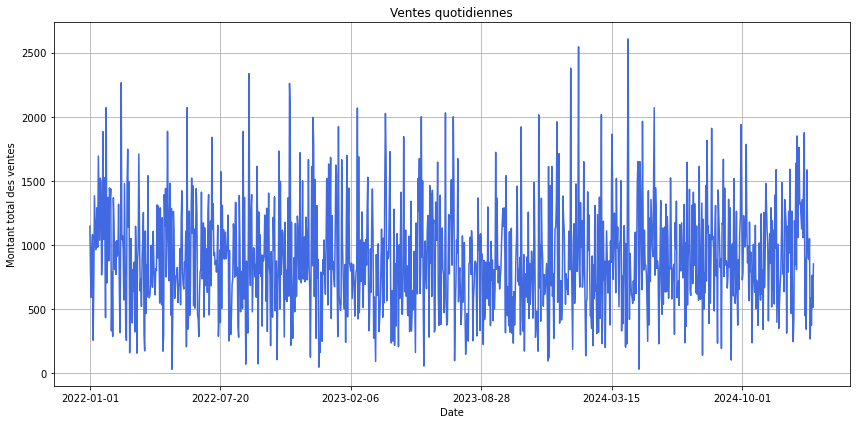

In [10]:
# Courbe des ventes quotidiennes

#Creation d'une figure avec une taille personnalisee (largeur=12, hauteur=6)
plt.figure(figsize=(12, 6))

#Agregation des ventes par jour (somme des total spent par date)
daily_sales = df.groupby('Transaction Date')['Total Spent'].sum()

#Tracage de la courbe des vente quotidienne
#Titre du graphique
#Couleur de la courbe
#Epaisseur de la ligne
daily_sales.plot(title='Ventes quotidiennes', color='royalblue', linewidth=2)

#Ajout des label et de la grid
plt.ylabel('Montant total des ventes')
plt.xlabel('Date')
plt.grid(True)

#Ajustement automatique pour eviter les coupures
plt.tight_layout()

#Affichage du graphique
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

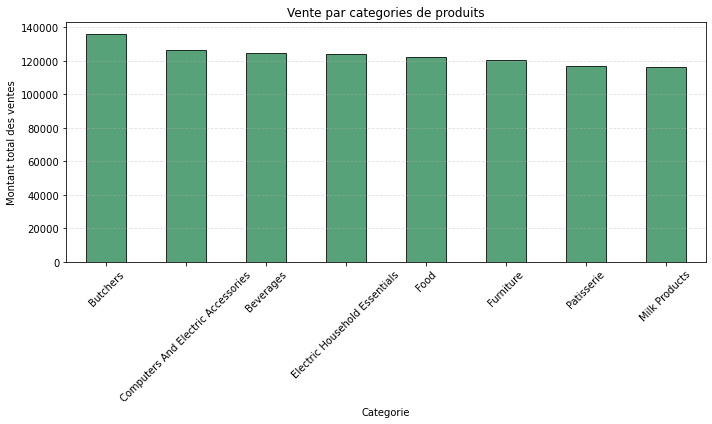

In [16]:
# Creation d'une nouvelle figure
plt.figure(figsize=(10,6))

#Agregation des ventes par categorie(triees par ordre decroissant)
category_sales= df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

#Trace du diagramme en arbres
category_sales.plot(kind='bar', #Type de graphique: barres
                    color='seagreen', #couleur des barres
                    edgecolor='black', #Contour noir pour les barres
                    alpha=0.8 #Transparence legere (0=transparence, 1=opaque)
)

#Personnalisation du graphique
plt.title('Vente par categories de produits')
plt.ylabel('Montant total des ventes')
plt.xlabel('Categorie')
plt.xticks(rotation=45)# rotation x des etiquette pour lisibiliter

plt.grid(axis='y', linestyle='--', alpha=0.4)

#Ajustement automatique pour eviter les coupures
plt.tight_layout()

#Affichage du graphique
plt.show

In [ ]:
# Creation d'une nouvelle figure
plt.figure(figsize=(10,6))

#Trace de nuage de points
plt.scatter(
    df['Price Per Unit'], #Valeur en x (prix unitaire)
    df['Quantity'], #Valeur en y (quantite vendue)
    alpha=0.6, #Transparence pour voir les points superposer
    color='coral', #Couleur des point
    edgecolor='white', #Contour blanc pour meilleur visibilite
    s=50 # Taille des points
)

#Personnalisation du graphique
plt.title('Relation entre prix unitaire et quantite vendue')
plt.ylabel('Prix par unite($)')
plt.xlabel('Quantite vendue')

plt.grid( True ,linestyle=':', alpha=0.4)

#Ajustement automatique pour eviter les coupures
plt.tight_layout()

#Affichage du graphique
plt.show

# Visualisation des donnees avec seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

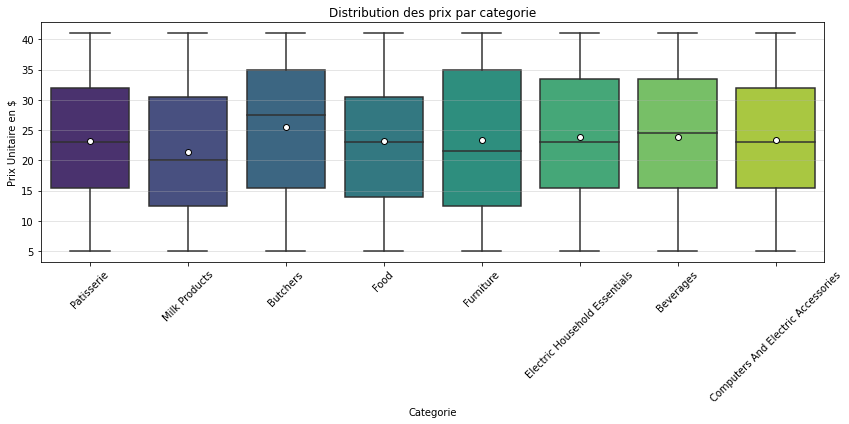

In [25]:
import seaborn as sns
plt.figure(figsize= (12,6))
sns.boxplot( 
    data=df,
    x='Category',
    y='Price Per Unit',
    palette='viridis', #Palette de couleurs
    showmeans= True, # Affiche la moyenne (marqueur vert)
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
)
plt.title('Distribution des prix par categorie')
#Personnalisation du graphique
plt.ylabel('Prix Unitaire en $')
plt.xlabel('Categorie')
plt.xticks(rotation=45)# rotation x des etiquette pour lisibiliter

plt.grid(axis='y', alpha=0.4)

#Ajustement automatique pour eviter les coupures
plt.tight_layout()

#Affichage du graphique
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

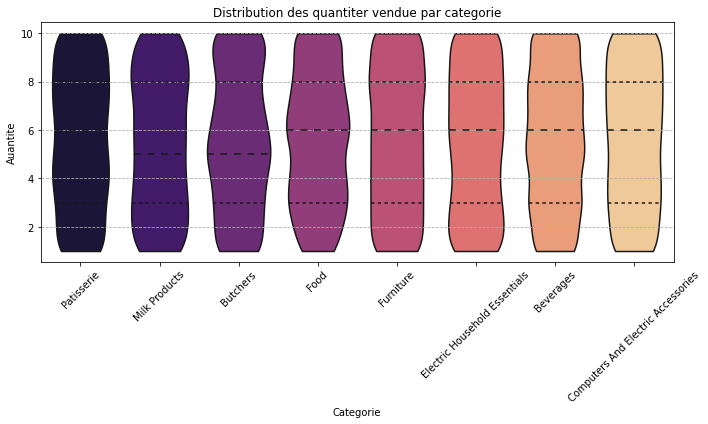

In [26]:
plt.figure(figsize= (10,6))
sns.violinplot( 
    data=df,
    x='Category',
    y='Quantity',
    palette='magma', #Palette de couleurs
    inner='quartitle',# Affiche les quartiles a l'interieur 
   cut=0 # Limite l'extension des violons
)
plt.title('Distribution des quantiter vendue par categorie')
#Personnalisation du graphique
plt.ylabel('Auantite')
plt.xlabel('Categorie')
plt.xticks(rotation=45)# rotation x des etiquette pour lisibiliter

plt.grid(axis='y', linestyle='--')

#Ajustement automatique pour eviter les coupures
plt.tight_layout()

#Affichage du graphique
plt.show

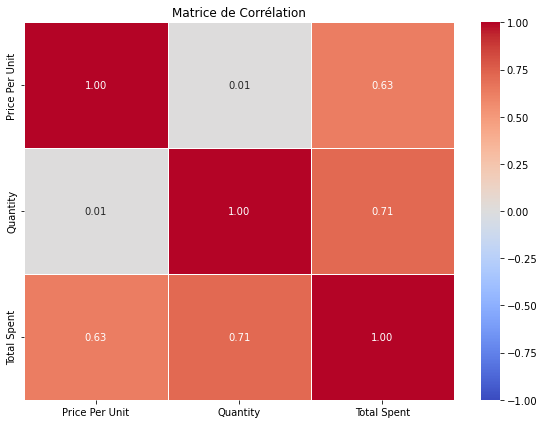

In [27]:
# Sélection des colonnes numériques
numeric_df = df[['Price Per Unit', 'Quantity', 'Total Spent']]

# Calcul de la matrice de corrélation
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,            # Affiche les valeurs
    cmap='coolwarm',       # Palette bleu (négatif) -> rouge (positif)
    vmin=-1, vmax=1,       # Échelle fixe de -1 à 1
    linewidths=0.5,
    fmt='.2f'              # Format à 2 décimales
)

plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.show()

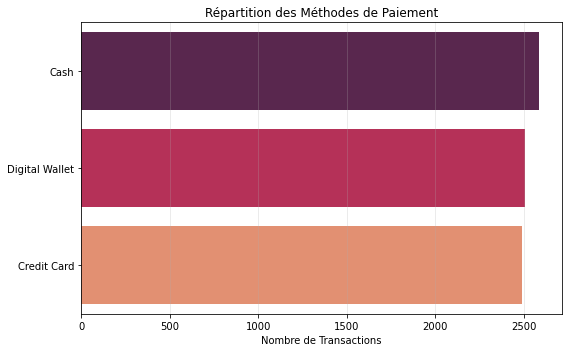

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    y='Payment Method',    # Orientation horizontale
    palette='rocket',      #Palette colorée
    order=df['Payment Method'].value_counts().index  # Tri par fréquence
)

plt.title('Répartition des Méthodes de Paiement')
plt.xlabel('Nombre de Transactions')
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()